In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
dataset = pd.ExcelFile('D:\Joss\Ciclo_5\Tecnicas_Programacion\Trabajofinal\data_can1.xls')
dataset = pd.read_excel(dataset,'Paper1')
print(dataset)

          Year          PP      T_max     T_min     T_prom       HR       v  \
0   1981-01-01  100.222280  18.246254  8.077462  13.161858  71.7284  2.7560   
1   1981-02-01  139.014821  18.585873  9.607421  14.096647  76.0896  2.6840   
2   1981-03-01  105.125833  18.849869  8.865782  13.857825  72.0932  2.4544   
3   1981-04-01   22.465072  18.542460  7.463444  13.002952  63.8000  2.7388   
4   1981-05-01    1.121600  18.247512  5.325515  11.786513  62.0504  2.5888   
..         ...         ...        ...       ...        ...      ...     ...   
427 2016-08-01    1.119447  19.262494  5.013405  12.137950  56.4896  3.0320   
428 2016-09-01    5.032873  20.311060  5.784997  13.048029  55.7800  3.1284   
429 2016-10-01   10.038845  20.428524  6.633688  13.531106  56.6404  2.8856   
430 2016-11-01    5.035502  21.039605  5.941671  13.490638  53.3416  2.9188   
431 2016-12-01   49.929394  19.486238  8.081207  13.783722  68.4384  2.5428   

        PP_pred  
0     81.953868  
1    106.847680

In [3]:
#Definiendo Variables (Predictor y Objetivo)
y = dataset['PP'] #Variable Objetivo 'target'
X = dataset['PP_pred'] #Variable predictor

#Definiendo Variable (Constante)
X = sm.add_constant(X)

#Modelo de regresion con statsmodels.api
linear_regression = sm.OLS(y,X)
fitted_model = linear_regression.fit()

#Resumen de los resultados 
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PP   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     1758.
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          5.22e-154
Time:                        20:34:49   Log-Likelihood:                -1860.0
No. Observations:                 432   AIC:                             3724.
Df Residuals:                     430   BIC:                             3732.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      1.241      0.002      0.9

In [4]:
from sklearn.metrics import r2_score, mean_squared_error

predictions=fitted_model.predict(X)

RMSE = np.sqrt(mean_squared_error(y, predictions))
r2 = r2_score(y, predictions)

denominator = np.sum((y - np.mean(y)) ** 2)
numerator = np.sum((predictions - y) ** 2)
nse_val = 1 - numerator / denominator

pbias =  np.sum(y - predictions)*100/np.sum(y)

print('r2: {:2.4f} \nRMSE: {:2.4f} \nNSE: {:2.4f} \nPbias: {:2.20f}'.format(r2, RMSE, nse_val, pbias))

r2: 0.8035 
RMSE: 17.9318 
NSE: 0.8035 
Pbias: 0.00000000000002379374


In [5]:
predictions=fitted_model.predict(X)
df_results = pd.DataFrame({'Actual': y, 'Predicted': predictions})
df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

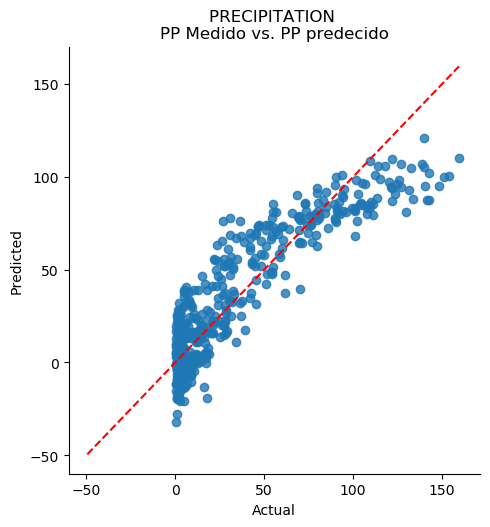

In [6]:
# Plotting the actual vs predicted values
sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)

# Plotting the diagonal line
d_line = np.arange(df_results.min().min(), df_results.max().max())
plt.plot(d_line, d_line, color='red', linestyle='--')
plt.title('PRECIPITATION \nPP Medido vs. PP predecido')
#plt.savefig("Boston_linear.png")
plt.show()